<a href="https://colab.research.google.com/github/MelquisedecIquin/CPE-031-Visualization-and-Data-Analysis/blob/main/Hands_On_Activity_9_IQUIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hands-On Activity 9 | Exploring Data Visually**





---



Name : Melquisedec Iquin <br>
Course Code and Title : CPE 031/ Visualization and Data Analysis<br>
Date Submitted : 10/16/2025<br>
Instructor : Engr. Marizette Sayo


---



**1. Objectives:**

This activity aims to demonstrate students’ ability to visually explore and analyze data using Python. Students will learn how to summarize and visualize categorical, quantitative, time-series, and geospatial data for exploratory data analysis (EDA).

**2. Intended Learning Outcomes (ILOs):**

By the end of this module the students should be able to demonstrate:
1. Analyze various visualization techniques to determine how data representation methods influence understanding, perception, and decision-making.

2. Evaluate existing visualizations in terms of accuracy, clarity, aesthetics, and accessibility, providing justified recommendations for improvement.

3. Create effective, insightful, and user-centered visualizations by integrating appropriate design principles, data encoding techniques, and visualization tools.

**3. Discussions:**

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics and gain insights before formal modeling. Visual exploration helps identify trends, relationships, and data quality issues.

Key Components:

Univariate Analysis:
Analyzing one variable at a time (e.g., histograms, bar charts).

Bivariate Analysis:
Exploring relationships between two variables (e.g., scatterplots, crosstabs).

Missing Data Analysis:
Identifying and handling missing or null values.

Time-Series Visualization:
Displaying data across time to reveal trends or seasonality.

Geospatial Visualization:
Mapping data to geographical regions to identify spatial patterns.

EDA is both an art and science combining statistical summaries with visual intuition.

**4. Procedures:**

**Color and Perception**

Section 1: Organizing and Exploring Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample dataset
data = {
    "Product": ["Juice", "Smoothie", "Juice", "Smoothie", "Juice", "Smoothie"],
    "Region": ["North", "South", "East", "West", "North", "East"],
    "Sales": [120, 150, 90, 110, 130, 170],
    "Profit": [30, 45, 20, 25, 35, 50]
}
df = pd.DataFrame(data)

# Display the dataset
df

,Product,Region,Sales,Profit
0,Juice,North,120,30
1,Smoothie,South,150,45
2,Juice,East,90,20
3,Smoothie,West,110,25
4,Juice,North,130,35
5,Smoothie,East,170,50


Task 1: Analyzing Variables One at a Time

/tmp/ipython-input-2975764973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Region", data=df, palette="Set2")


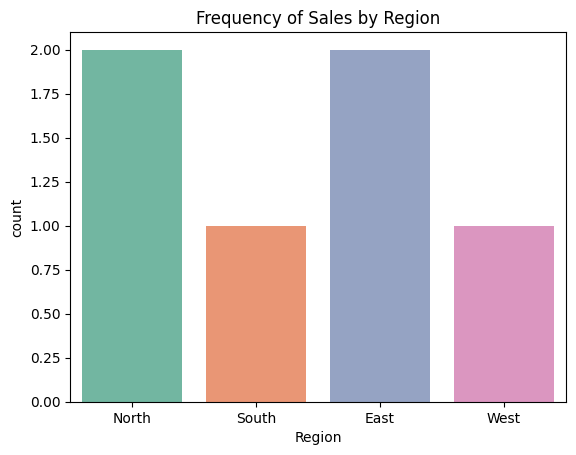

In [2]:
#Categorical Variable
# Countplot for categorical variable
sns.countplot(x="Region", data=df, palette="Set2")
plt.title("Frequency of Sales by Region")
plt.show()


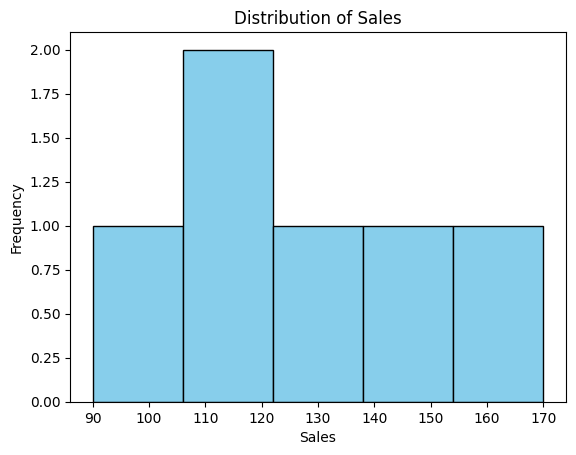

In [3]:
#Quantitative Variable
# Histogram for quantitative variable
plt.hist(df["Sales"], bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

Task: <br>
Create one countplot for Product and one histogram for Profit. <br>
Compare their patterns and interpret what they mean.

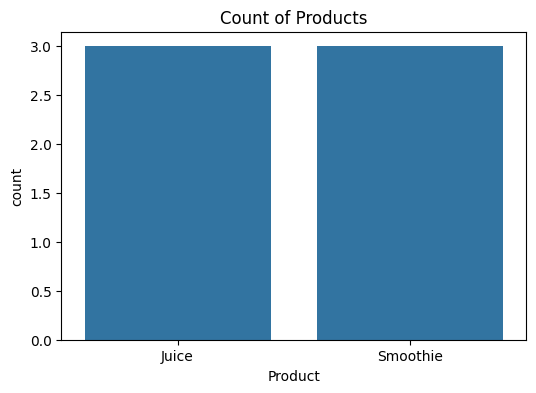

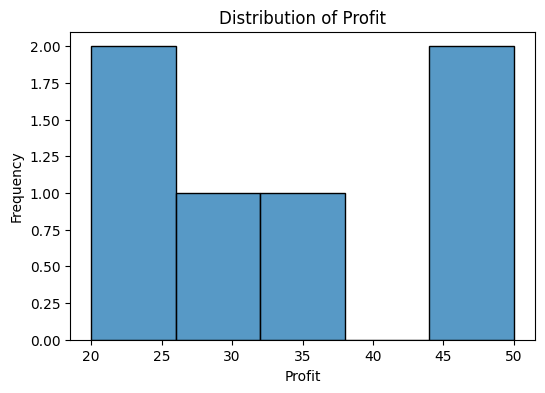

In [4]:
#Code here
# Countplot for Product
plt.figure(figsize=(6,4))
sns.countplot(x="Product", data=df)
plt.title("Count of Products")
plt.show()

# Histogram for Profit
plt.figure(figsize=(6,4))
sns.histplot(df["Profit"], bins=5, kde=False)
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()


Section 2: Relationships Between Variables

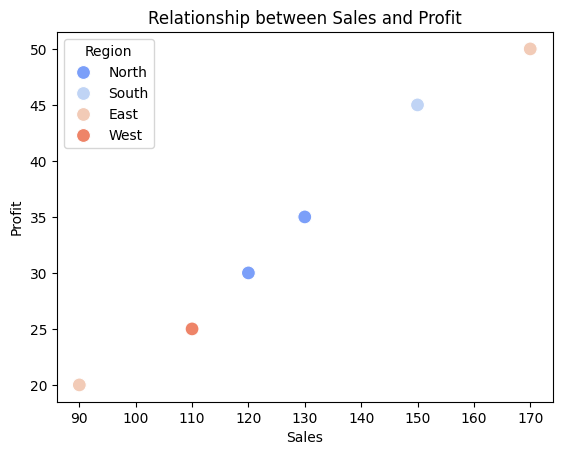

In [14]:
# Scatterplot: Sales vs Profit
sns.scatterplot(x="Sales", y="Profit", hue="Region", data=df, palette="coolwarm", s=100)
plt.title("Relationship between Sales and Profit")
plt.show()

In [15]:
# Crosstabulation example
pd.crosstab(df["Region"], df["Product"], values=df["Sales"], aggfunc="mean").fillna(0)


Product,Juice,Smoothie
Region,,
East,90.0,170.0
North,125.0,0.0
South,0.0,150.0
West,0.0,110.0


Task: <br>
Interpret whether higher sales also mean higher profit. <br>
Which region seems to perform best?

Higher sales generally lead to higher profits, as the scatterplot shows that larger sales values correspond to larger profit values, and the East region seems to perform the best since it has high average sales for both Juice and Smoothie.

Section 3: Analysis of Missing Data

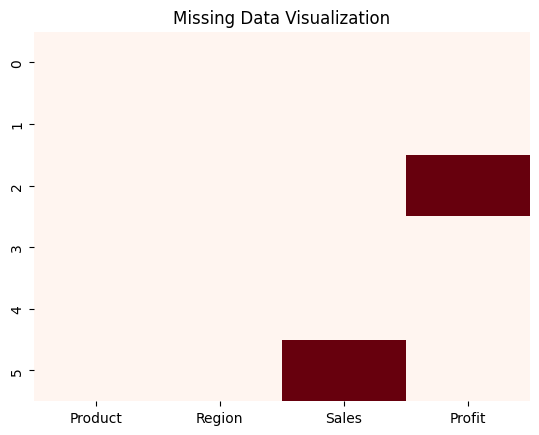

,0
Product,0
Region,0
Sales,1
Profit,1


In [5]:
# Introduce missing data
df_missing = df.copy()
df_missing.loc[2, "Profit"] = np.nan
df_missing.loc[5, "Sales"] = np.nan

# Visualize missing data
sns.heatmap(df_missing.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Visualization")
plt.show()

# Display missing summary
df_missing.isnull().sum()


Task: <br>
Describe what you observe in the missing data visualization. <br>
Which variables need attention before analysis?

*Answer here
- The heatmap shows that there are missing values in the dataset: one missing value in the Profit column (row 2) and one missing value in the Sales column (row 5). Both Sales and Profit need attention before analysis, as these are key numerical variables for calculating relationships and statistics.

Section 4: Visualizing Time-Series Data

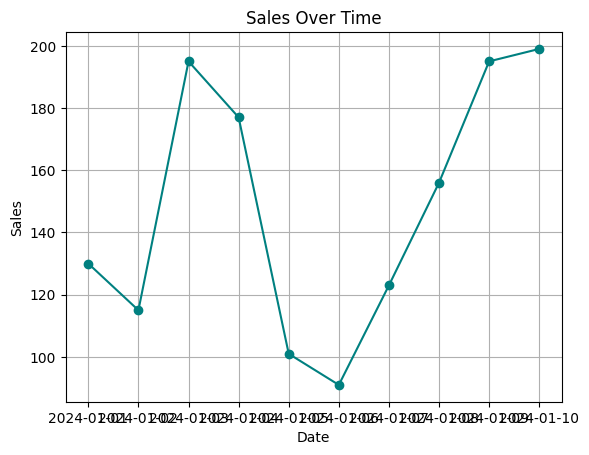

In [6]:
# Generate time-series example
dates = pd.date_range(start="2024-01-01", periods=10)
sales = np.random.randint(80, 200, 10)
ts_df = pd.DataFrame({"Date": dates, "Sales": sales})

# Line chart for time-series
plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal")
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

Task: <br>
Add a moving average line (rolling mean) to smooth fluctuations. <br>
Hint: Use ts_df["Sales"].rolling(window=3).mean().

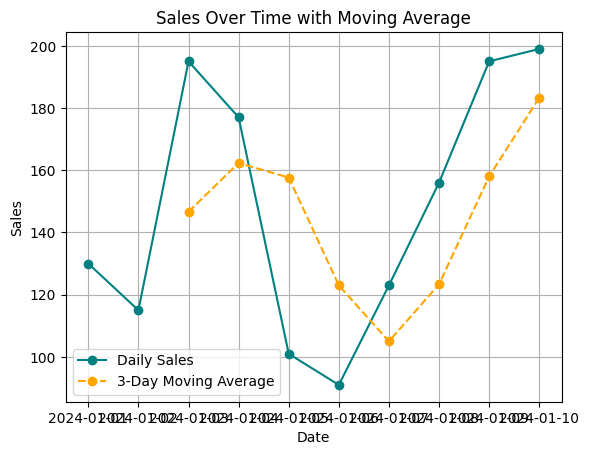

In [8]:
#Code here

ts_df["Sales_MA3"] = ts_df["Sales"].rolling(window=3).mean()

# Plot original sales
plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal", label="Daily Sales")

# Plot moving average
plt.plot(ts_df["Date"], ts_df["Sales_MA3"], marker="o", color="orange", linestyle="--", label="3-Day Moving Average")

plt.title("Sales Over Time with Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()


Section 5: Visualizing Geospatial Data

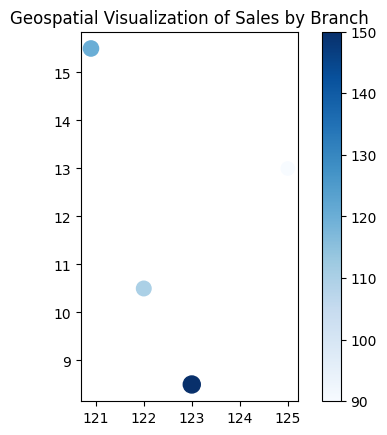

In [9]:
import geopandas as gpd
from shapely.geometry import Point

# Sample coordinates (latitude, longitude)
coords = {
    "Branch": ["North", "South", "East", "West"],
    "Latitude": [15.5, 8.5, 13.0, 10.5],
    "Longitude": [120.9, 123.0, 125.0, 122.0],
    "Sales": [120, 150, 90, 110]
}

geo_df = pd.DataFrame(coords)
geo_df["geometry"] = [Point(xy) for xy in zip(geo_df.Longitude, geo_df.Latitude)]
gdf = gpd.GeoDataFrame(geo_df, geometry="geometry")

# Plot simple map (Philippines outline optional if available)
gdf.plot(column="Sales", cmap="Blues", legend=True, markersize=geo_df["Sales"])
plt.title("Geospatial Visualization of Sales by Branch")
plt.show()

Task: <br>
Interpret which branch has the highest sales geographically. <br>
How can such visualization help in business decision-making?

*Answer here
- The South branch has the highest sales, as indicated by the largest and darkest marker on the map. This type of geospatial visualization helps businesses understand regional performance, identify high and low performing areas, allocate resources more efficiently, plan targeted marketing campaigns, and make informed strategic decisions based on the geographic distribution of sales.

**5. Supplementary Activity**

Create your own mini exploratory analysis:

1. Choose a dataset (e.g., from Kaggle, or a CSV file you have).

2. Perform:

*   Univariate analysis (1 categorical + 1 quantitative)
*   Bivariate analysis (scatterplot or crosstab)
*   Missing data visualization
*   Time-series or geospatial visualization (choose one)
3. Summarize your key insights using visual interpretation.

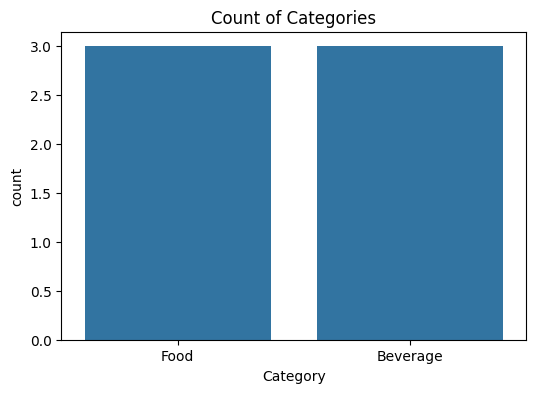

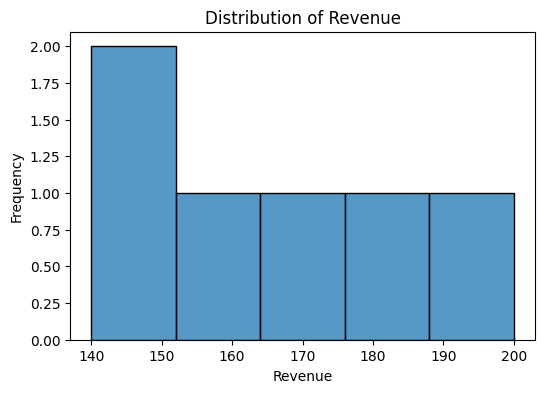

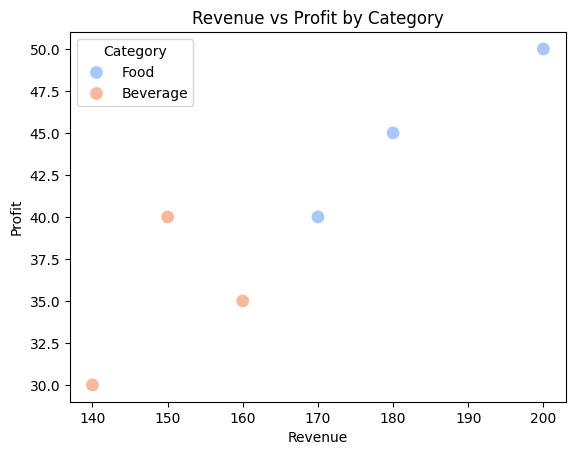

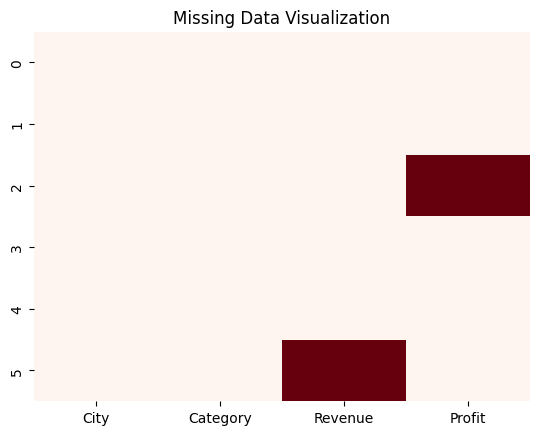

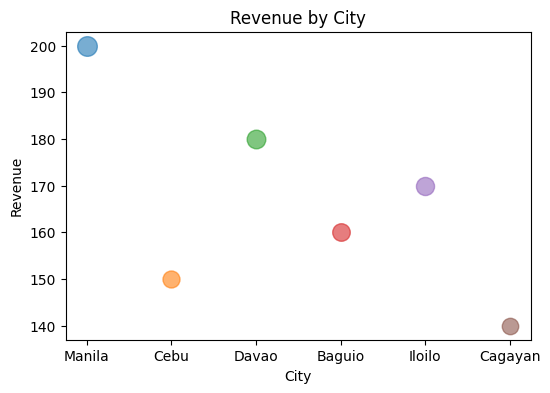

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "City": ["Manila", "Cebu", "Davao", "Baguio", "Iloilo", "Cagayan"],
    "Category": ["Food", "Beverage", "Food", "Beverage", "Food", "Beverage"],
    "Revenue": [200, 150, 180, 160, 170, 140],
    "Profit": [50, 40, 45, 35, 40, 30]
}
df = pd.DataFrame(data)

plt.figure(figsize=(6,4))
sns.countplot(x="Category", data=df)
plt.title("Count of Categories")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["Revenue"], bins=5, kde=False)
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

sns.scatterplot(x="Revenue", y="Profit", hue="Category", data=df, s=100, palette="coolwarm")
plt.title("Revenue vs Profit by Category")
plt.show()

pd.crosstab(df["City"], df["Category"], values=df["Revenue"], aggfunc="mean").fillna(0)

df_missing = df.copy()
df_missing.loc[2, "Profit"] = np.nan
df_missing.loc[5, "Revenue"] = np.nan

sns.heatmap(df_missing.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Visualization")
plt.show()

plt.figure(figsize=(6,4))
for i, row in df.iterrows():
    plt.scatter(row["City"], row["Revenue"], s=row["Revenue"], alpha=0.6)
plt.title("Revenue by City")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.show()


**6. Conclusion/Learnings/Analysis:**

*Type it here
- Overall, the activity shows a full exploratory data analysis. Univariate analysis revealed the counts of categories and the range of numerical values. Bivariate analysis showed that higher sales usually lead to higher profit, and crosstabs highlighted the best-performing regions or cities. Missing data visualization showed which values need to be fixed. Time-series and geospatial plots showed trends over time and the locations with the highest sales. Together, these analyses help understand patterns, make better business decisions, and identify areas to focus on.